In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving LabTAT.csv to LabTAT.csv


For 5% Significance, alpha = 0.05. 

Null Hypothesis, Ho : µ1=µ2=µ3=µ4

Alternative Hypothesis, Ha : At least one is different

**To check whether the mean of any of these samples are different or the same we conduct ANOVA test.**

In [4]:
lab = pd.read_csv("LabTAT.csv")

In [5]:
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [6]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [7]:
lab1 = pd.Series(lab.iloc[:,0])
print(lab1)
print('\nLaboratory 1 Avg = ',lab1.mean())

0      185.35
1      170.49
2      192.77
3      177.33
4      193.41
        ...  
115    178.49
116    176.08
117    202.48
118    182.40
119    182.09
Name: Laboratory 1, Length: 120, dtype: float64

Laboratory 1 Avg =  178.36158333333336


In [8]:
lab2 = pd.Series(lab.iloc[:,1])
print(lab2)
print('\nLaboratory 2 Avg = ',lab2.mean())

0      165.53
1      185.91
2      194.92
3      183.00
4      169.57
        ...  
115    170.66
116    183.98
117    174.54
118    197.18
119    215.17
Name: Laboratory 2, Length: 120, dtype: float64

Laboratory 2 Avg =  178.9029166666667


In [9]:
lab3 = pd.Series(lab.iloc[:,2])
print(lab3)
print('\nLaboratory 3 Avg = ',lab3.mean())

0      176.70
1      198.45
2      201.23
3      199.61
4      204.63
        ...  
115    193.80
116    215.25
117    203.99
118    194.52
119    221.49
Name: Laboratory 3, Length: 120, dtype: float64

Laboratory 3 Avg =  199.91324999999998


In [10]:
lab4 = pd.Series(lab.iloc[:,3])
print(lab4)
print('\nLaboratory 4 Avg = ',lab4.mean())

0      166.13
1      160.79
2      185.18
3      176.42
4      152.60
        ...  
115    172.68
116    177.64
117    170.27
118    150.87
119    162.21
Name: Laboratory 4, Length: 120, dtype: float64

Laboratory 4 Avg =  163.68275


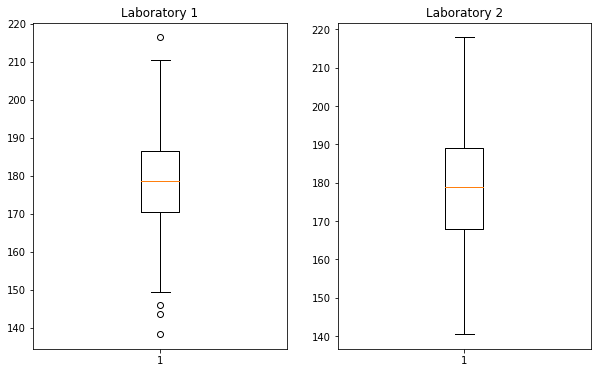

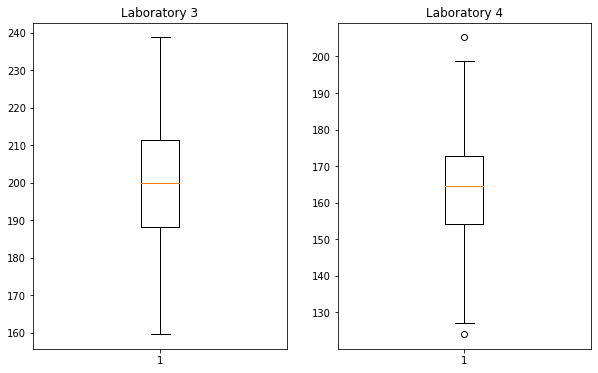

In [11]:
plt.subplots(figsize = (10,6))

plt.subplot(1,2,1)
plt.boxplot(lab['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(1,2,2)
plt.boxplot(lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.show()

plt.subplots(figsize = (10,6))

plt.subplot(1,2,1)
plt.boxplot(lab['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(1,2,2)
plt.boxplot(lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

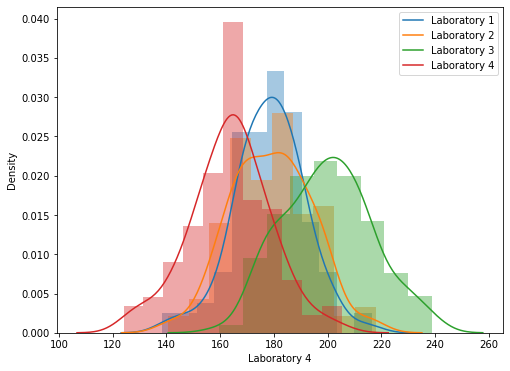

In [16]:
plt.figure(figsize = (8,6))

sns.distplot(lab['Laboratory 1'], kde=True)
sns.distplot(lab['Laboratory 2'], kde=True)
sns.distplot(lab['Laboratory 3'], kde=True)
sns.distplot(lab['Laboratory 4'], kde=True)
plt.legend(labels=['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])
plt.show()

Text(0.5, 1.0, 'Laboratory 4')

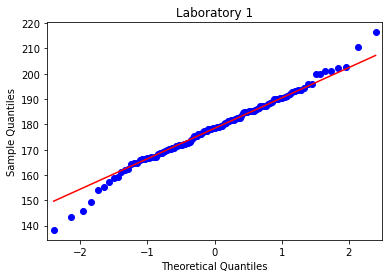

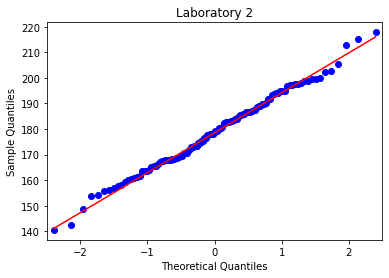

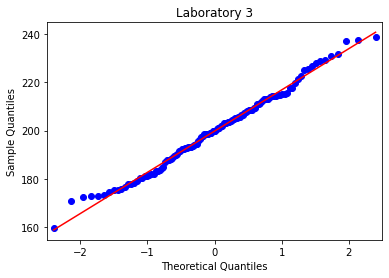

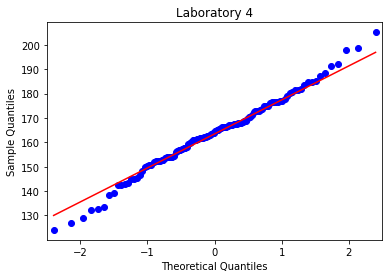

In [21]:
# QQ-Plot to check the distribution
sm.qqplot(lab['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(lab['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(lab['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(lab['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')


In [32]:
from scipy import stats

test_statistic , p_value = stats.f_oneway(lab1,lab2,lab3,lab4)
p_value

2.1156708949992414e-57

In [34]:
print('p-value =', p_value)

p-value = 2.1156708949992414e-57


If p_value<=alpha, we fail to reject Null Hypothesis because of lack of evidence

If p_value>alpha, we reject Null Hypothesis

In [35]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null Hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis


Hence, We fail to reject Null Hypothesis because there is lack of evidence.

**There is no significant difference between the samples**